In [46]:
import warnings
warnings.filterwarnings('ignore')


In [47]:
import pandas as pd
import numpy as np
from cnp.experiment import WorkingDirectory, generate_root
import os
import matplotlib.pyplot as plt
import matplotlib


In [48]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 

In [49]:
models = ["GNP", "AGNP", "convGNP", "TEGNP",  "MeanTEGNP", "MeanTEAGNP"]
colours = ["tab:blue", "tab:orange", "tab:purple", "tab:olive", "tab:red", "tab:cyan"]
datas = ["eq", "matern", "noisy-mixture", "sawtooth", "weakly-periodic"]
markers = ["o", "x", "s"]
covs = ["innerprod-homo", "kvv-homo", "meanfield"]
seeds = ['0']



In [50]:
experiments = []
row_labels = []
column_labels = []
for m, colour in zip(models, colours):
    for d in datas:
        for s in seeds:
            for c, marker in zip(covs, markers):          
                experiment_name = os.path.join('_experiments', 
                                               f'{d}',
                                               'models', 
                                               f'{m}',
                                               f'{c}',
                                               f'{s}')

                wd = WorkingDirectory(root=experiment_name, print_root=False)
                experiments.append((d, m, c, s, colour, marker, wd.root ))
                
row_labels.append("Oracle-GP")
                
for m in models:
    for c in covs:
        row_labels.append(f'{m}-{c}')
        

for d in datas:
    column_labels.append(f'{d}')
    column_labels.append(f'{d}-error')
    column_labels.append(f'{d}-iterations')
    column_labels.append(f'{d}-num-params')

column_labels.append("marker")
column_labels.append("colour")


# Create an empty dataframe
df = pd.DataFrame(index=row_labels, columns=column_labels)

In [51]:
for d in datas:
    experiment_name = os.path.join('_experiments', 
                                   f'{d}',
                                   'models', 
                                   'Oracle-GP')

    wd = WorkingDirectory(root=experiment_name, print_root=False)
    if os.path.isfile(os.path.join(wd.root, 'test_log_likelihood.txt')):
        mean = -np.loadtxt(wd.file('test_log_likelihood.txt', 
                                exists=True))
        error = np.loadtxt(wd.file('test_log_likelihood_standard_error.txt',
                                exists=True))/np.sqrt(2048)
        df.at["Oracle-GP", f'{d}'] = mean
        df.at["Oracle-GP", f'{d}-error'] = error
    else:
        print(f'No results {wd.root}')

No results _experiments/sawtooth/models/Oracle-GP


In [52]:
for e in experiments:
    d, m, c, s, colour, marker, r = e
    row_label = f'{m}-{c}'

    experiment_name = os.path.join('_experiments', 
                                               f'{d}',
                                               'models', 
                                               f'{m}',
                                               f'{c}',
                                               f'{s}')

    wd = WorkingDirectory(root=experiment_name, print_root=False)
    if os.path.isfile(os.path.join(wd.root, 'test_log_likelihood.txt')):
        mean = -np.loadtxt(wd.file('test_log_likelihood.txt', 
                                exists=True))
        error = np.loadtxt(wd.file('test_log_likelihood_standard_error.txt',
                                exists=True))/np.sqrt(2048)
        num_params = np.loadtxt(wd.file('num_params.txt',
                                exists=True))
        
        df.at[row_label, f'{d}-num-params'] = num_params
        
        df.at[row_label, f'{d}'] = mean
        df.at[row_label, f'{d}-error'] = error
        df.at[row_label, 'colour'] = colour
        df.at[row_label, 'marker'] = marker
    else:
        print(f'No results {wd.root}')
    
    iteration = np.loadtxt(wd.file('last_epoch.txt',
                                exists=True))
    df.at[row_label, f'{d}-iterations'] = iteration



AssertionError: File "_experiments/sawtooth/models/GNP/innerprod-homo/0/num_params.txt" does not exist.

In [38]:
df

,eq,eq-error,eq-iterations,eq-num-params,matern,matern-error,matern-iterations,matern-num-params,noisy-mixture,noisy-mixture-error,...,sawtooth,sawtooth-error,sawtooth-iterations,sawtooth-num-params,weakly-periodic,weakly-periodic-error,weakly-periodic-iterations,weakly-periodic-num-params,marker,colour
Oracle-GP,1222.816687,16.429839,NaN,NaN,894.661608,14.651982,NaN,NaN,691.684771,15.914339,...,NaN,NaN,NaN,NaN,-770.754241,12.853036,NaN,NaN,NaN,NaN
GNP-innerprod-homo,27.55674,0.010155,10001.0,132738.0,362.863148,10.207307,10001.0,[],-332.88756,7.056718,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,o,tab:blue
GNP-kvv-homo,926.888246,15.031867,10001.0,132868.0,441.219968,10.979509,10001.0,[],-267.44821,7.576593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x,tab:blue
GNP-meanfield,-42.513687,15.419755,10001.0,[],-587.167955,14.636377,10001.0,[],-1626.755339,22.36379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,s,tab:blue
AGNP-innerprod-homo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGNP-kvv-homo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGNP-meanfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
convGNP-innerprod-homo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
convGNP-kvv-homo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
convGNP-meanfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df[d + "-error"]["Oracle-GP"]

12.853035915995655

In [33]:
def plot_results(d, df):
    plt.xticks([])
    x = np.arange(len(df[d]))
    ones = np.ones_like(x)
    y = df[d]
    e = df[d + '-error']
    oracle_result = df[d]["Oracle-GP"]
    oracle_error = df[d + "-error"]["Oracle-GP"]
    label = df.index
    colour = df['colour'].tolist()
    marker = df['marker'].tolist()
    
    plt.plot(x, oracle_result * ones, label='Oracle-GP', color='k')
    plt.fill_between(x,
                     (oracle_result + oracle_error) * ones,
                     (oracle_result - oracle_error) * ones,
                     color='k', alpha=0.1)
    
    for i in range(1, len(x)):
        plt.errorbar(x[i], y[i], e[i], marker=marker[i], color=colour[i], label=label[i])
    plt.legend( ncol=6 ,bbox_to_anchor=(1.3, 0))
    plt.title(d)
    plt.show()


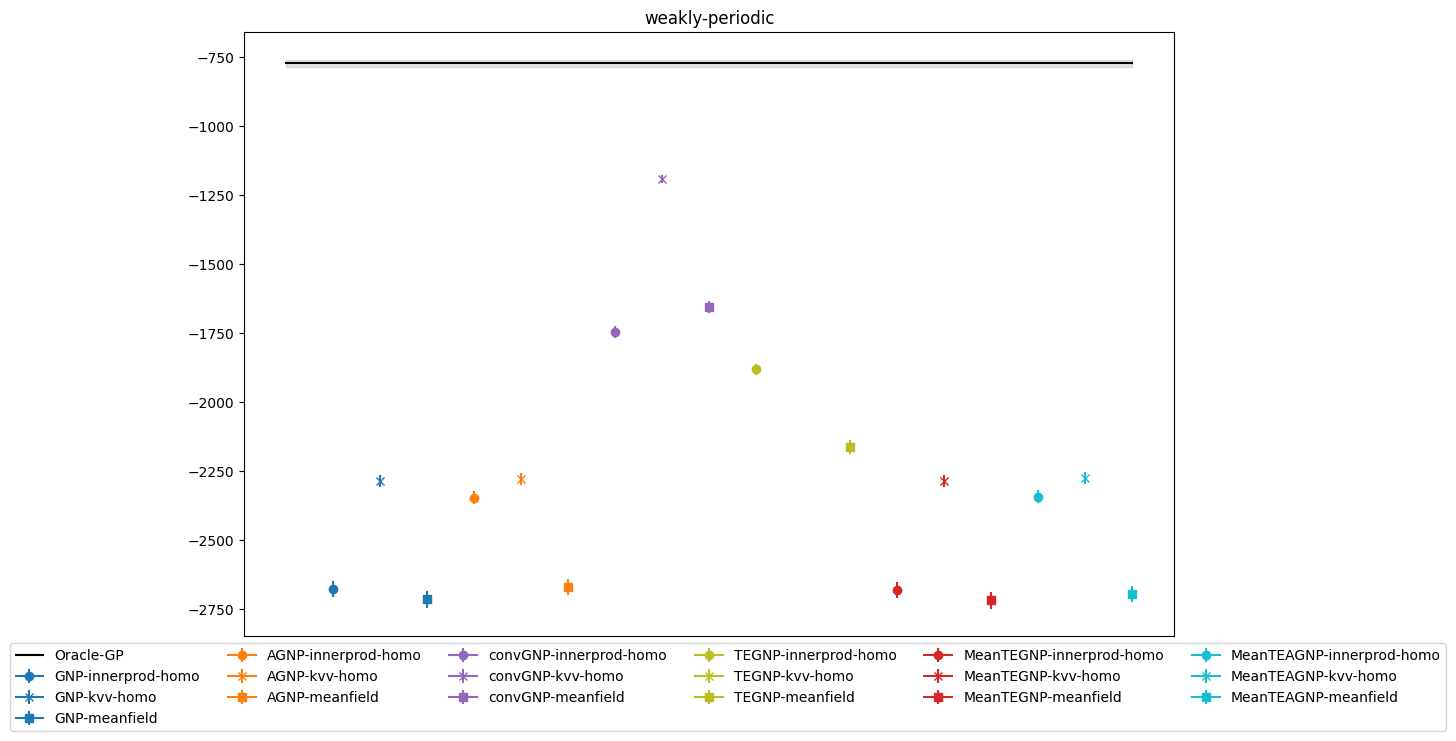

In [34]:
plot_results("weakly-periodic", df)